<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入数据" data-toc-modified-id="导入数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#对数据进行预处理" data-toc-modified-id="对数据进行预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>对数据进行预处理</a></span><ul class="toc-item"><li><span><a href="#保留service为http的数据" data-toc-modified-id="保留service为http的数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>保留service为http的数据</a></span></li><li><span><a href="#对于类型数据进行标签编码" data-toc-modified-id="对于类型数据进行标签编码-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>对于类型数据进行标签编码</a></span></li><li><span><a href="#拆分训练集和测试集" data-toc-modified-id="拆分训练集和测试集-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>拆分训练集和测试集</a></span></li></ul></li><li><span><a href="#孤立森林模型训练" data-toc-modified-id="孤立森林模型训练-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>孤立森林模型训练</a></span></li><li><span><a href="#进行预测和评估模型" data-toc-modified-id="进行预测和评估模型-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>进行预测和评估模型</a></span><ul class="toc-item"><li><span><a href="#查看path分布" data-toc-modified-id="查看path分布-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>查看path分布</a></span></li><li><span><a href="#通过数据分布来选择阈值" data-toc-modified-id="通过数据分布来选择阈值-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>通过数据分布来选择阈值</a></span></li><li><span><a href="#根据模型来进行预测评估" data-toc-modified-id="根据模型来进行预测评估-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>根据模型来进行预测评估</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# 导入数据

从http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html下载验证数据

In [32]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
df = pd.read_csv("/Users/renzhiqiang/Downloads/kddcup.data.gz", sep=",", names=columns, index_col=None)
df.shape

(4898431, 42)

In [33]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


# 对数据进行预处理

## 保留service为http的数据

In [34]:
df = df[df["service"]=="http"]
df = df.drop("service", axis=1)
if "service" in columns:
    columns.remove("service")

In [35]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [36]:
df["label"].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

## 对于类型数据进行标签编码

In [37]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        # 进行替换
        df[col] = encoded.transform(df[col])

In [38]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


## 拆分训练集和测试集

In [50]:
from sklearn.model_selection import train_test_split
for f in range(0, 3):
    df = df.iloc[np.random.permutation(len(df))]
    
df2 = df[:500000]
labels = df2["label"]
df_validate=df[500000:]
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size=0.2, random_state=42)

x_val, y_val = df_validate, df_validate["label"]

x_train = x_train.drop("label", axis=1)
x_val = x_val.drop("label", axis=1)
x_test = x_test.drop("label", axis=1)

In [51]:
print("Train:", x_train.shape, y_train.shape)
print("Val: ", x_val.shape, y_val.shape)
print("Test: ", x_test.shape, y_test.shape)

Train: (400000, 40) (400000,)
Val:  (123091, 40) (123091,)
Test:  (100000, 40) (100000,)


# 孤立森林模型训练

In [52]:
iforest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state=42)
iforest.fit(x_train)

/Users/renzhiqiang/miniconda3/envs/aiops/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=256, random_state=42)

# 进行预测和评估模型

## 查看path分布

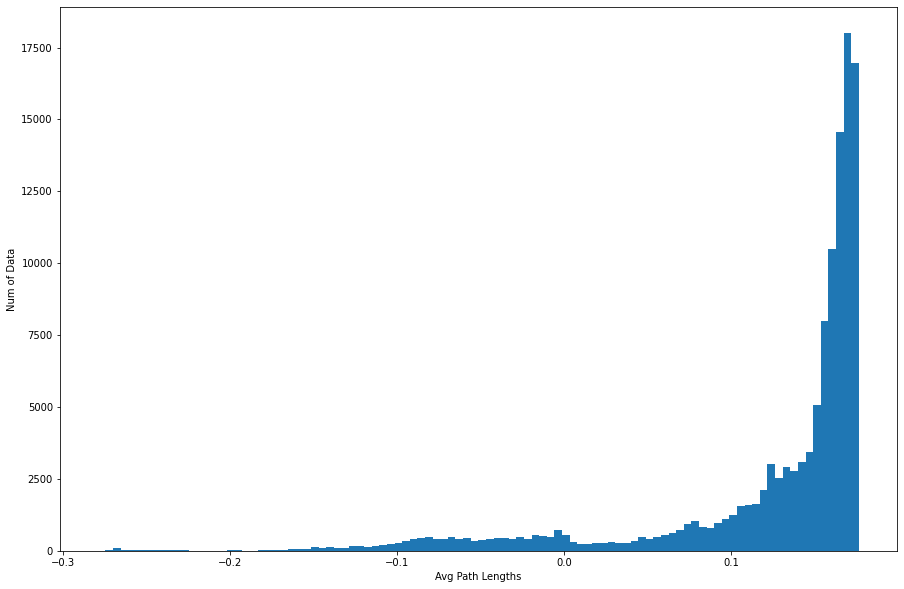

In [53]:
anomaly_scores = iforest.decision_function(x_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel("Avg Path Lengths")
plt.ylabel("Num of Data")
plt.show()

## 通过数据分布来选择阈值
```python

from scipy import stats 
print(-stats.scoreatpercentile(-anomaly_scores, 100. * (1. - 0.001)))
```
也通过这种方法计算阈值

In [115]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.26
actuals = y_val == list(encoded.classes_).index("normal.")

auc = roc_auc_score(anomalies, actuals)

print("AUC: {:.2%}".format(auc))

AUC: 99.73%


## 根据模型来进行预测评估

In [72]:
y_pred = iforest.predict(x_val)

In [74]:
anomalies = y_pred == 1
actuals = y_val == list(encoded.classes_).index("normal.")

auc = roc_auc_score(anomalies, actuals)

print("AUC: {:.2%}".format(auc))

AUC: 53.31%


In [114]:

# self.threshold_ = -sp.stats.scoreatpercentile(
#     -self.decision_function(X), 100. * (1. - self.contamination))
from scipy import stats 
print(-stats.scoreatpercentile(-anomaly_scores, 100. * (1. - 0.001)))

-0.26480538587726765


In [110]:
np.sort(anomaly_scores)[:50]

array([-0.27919792, -0.27776092, -0.27723848, -0.27604167, -0.27604167,
       -0.27567328, -0.27567328, -0.27567328, -0.27554147, -0.27463157,
       -0.27463157, -0.27452363, -0.27452363, -0.27452363, -0.27307166,
       -0.27244474, -0.27203348, -0.2719259 , -0.27151491, -0.27151491,
       -0.27151491, -0.27140741, -0.27119338, -0.27119338, -0.2709967 ,
       -0.2709967 , -0.2709967 , -0.27088927, -0.27047883, -0.26996132,
       -0.26985403, -0.26944415, -0.26944415, -0.26944415, -0.26944415,
       -0.26944415, -0.26933694, -0.26933694, -0.26892734, -0.26892734,
       -0.26892734, -0.26892734, -0.26892734, -0.26892734, -0.26892734,
       -0.26841087, -0.26841087, -0.26841087, -0.26841087, -0.26841087])